# Lecture 11 Spatial Data Visualization

In [2]:
#import geopandas as gpd
#import geoplot as gplt
!conda list


# packages in environment at /Users/minchen/opt/anaconda3/envs/geospatial:
#
# Name                    Version                   Build  Channel
access                    1.1.8              pyhd8ed1ab_0    conda-forge
aenum                     3.1.11             pyhd8ed1ab_0    conda-forge
affine                    2.4.0              pyhd8ed1ab_0    conda-forge
aiofiles                  22.1.0             pyhd8ed1ab_0    conda-forge
aiohttp                   3.8.4            py39ha30fb19_0    conda-forge
aiosignal                 1.3.1              pyhd8ed1ab_0    conda-forge
aiosqlite                 0.18.0             pyhd8ed1ab_0    conda-forge
altair                    4.2.2              pyhd8ed1ab_0    conda-forge
amply                     0.1.5              pyhd8ed1ab_0    conda-forge
aniso8601                 9.0.1              pyhd8ed1ab_0    conda-forge
anyio                     3.6.2              pyhd8ed1ab_0    conda-forge
aom                       3.5.0                hf0c8a

In [16]:
import sys
print("Python version")
print (sys.version)

Python version
3.7.16 (default, Jan 17 2023, 09:28:58) 
[Clang 14.0.6 ]


In [17]:
usa = gpd.read_file("maps/cb_2018_us_state_20m.shp")
usa.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


In [7]:
import pandas as pd
state_pop = pd.read_csv("nst-est2018-alldata.csv")
state_pop.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2017,RDOMESTICMIG2018,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018
0,10,0,0,0,United States,308745538,308758105,309326085,311580009,313874218,...,0.000000,0.000000,2.553948,2.746049,2.701727,2.988276,3.328598,3.321549,2.941086,3.001086
1,20,1,0,0,Northeast Region,55317240,55318430,55380645,55600532,55776729,...,-5.651919,-5.222289,0.845134,0.040762,-0.397011,-0.923951,-2.011735,-2.430459,-1.801582,-1.127222
2,20,2,0,0,Midwest Region,66927001,66929743,66974749,67152631,67336937,...,-2.370672,-2.301663,-1.043009,-0.896575,0.042505,-0.715656,-1.357662,-1.226811,-0.519621,-0.431833
3,20,3,0,0,South Region,114555744,114563045,114867066,116039399,117271075,...,2.963135,2.779373,5.379667,5.836112,5.290067,6.206402,7.328494,7.225046,6.252425,6.148925
4,20,4,0,0,West Region,71945553,71946887,72103625,72787447,73489477,...,1.478565,1.350094,2.689358,3.226360,3.343874,4.148127,5.127995,5.372314,4.164981,3.965769


In [8]:
pop_states = usa.merge(state_pop, left_on="NAME", right_on="NAME")
pop_states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,...,RDOMESTICMIG2017,RDOMESTICMIG2018,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...",...,-3.991992,-4.063440,3.600733,3.315179,1.775836,1.160255,0.315784,-1.352135,-0.208652,-0.322019
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827...",...,-1.278002,-0.916222,1.843768,-0.120479,2.359797,1.925327,0.702299,0.036461,0.573348,0.934001
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757...",...,4.689728,7.127976,4.801565,4.910826,6.209397,6.493793,6.755571,5.516683,6.460703,9.019623
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...",...,-0.698138,-1.040184,-1.999325,-1.820990,0.365060,-0.030544,-0.494039,-0.313424,0.968963,0.716636
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987...",...,-2.144836,-1.598828,1.516750,0.547598,-0.023724,-0.133225,-0.921843,-0.952470,0.302260,1.165270


<AxesSubplot:>

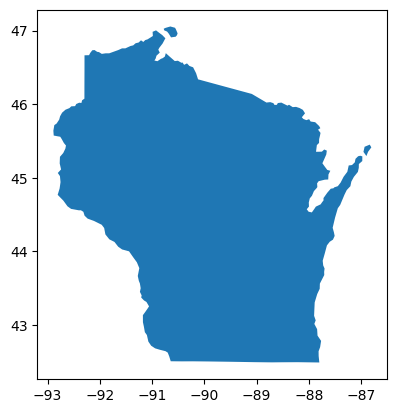

In [9]:
pop_states[pop_states.NAME=="Wisconsin"].plot()


<AxesSubplot:>

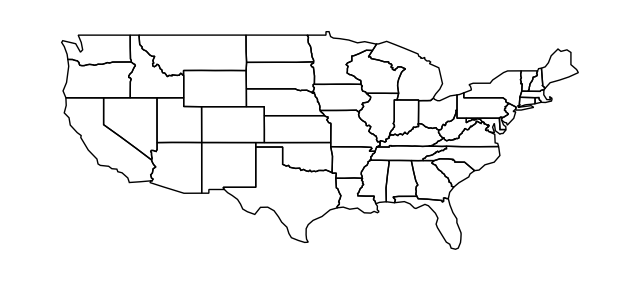

In [10]:
path = gplt.datasets.get_path("contiguous_usa")
contiguous_usa = gpd.read_file(path)
gplt.polyplot(contiguous_usa)

<AxesSubplot:>

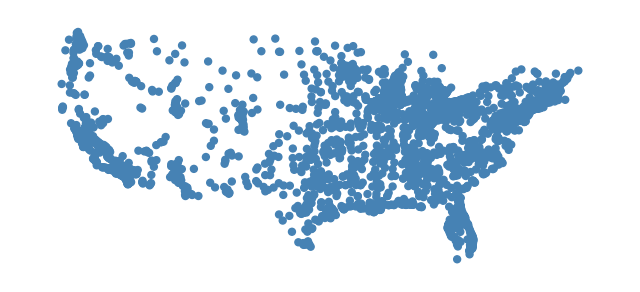

In [11]:
path = gplt.datasets.get_path("usa_cities")
usa_cities = gpd.read_file(path)
continental_usa_cities = usa_cities.query('STATE not in ["HI", "AK", "PR"]')
gplt.pointplot(continental_usa_cities)

In [1]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import numpy as np
import matplotlib.pyplot as plt

continental_usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
continental_usa_cities = continental_usa_cities.query('STATE not in ["AK", "HI", "PR"]')
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))


proj = gcrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5)

f, axarr = plt.subplots(2, 2, figsize=(12, 9), subplot_kw={'projection': proj})

polyplot_kwargs = {'facecolor': (0.9, 0.9, 0.9), 'linewidth': 0}
pointplot_kwargs = {
    'scale': 'ELEV_IN_FT', 'edgecolor': 'white', 'linewidth': 0.5, 'color': 'black'
}


gplt.polyplot(contiguous_usa.geometry, ax=axarr[0][0], **polyplot_kwargs)
gplt.pointplot(
    continental_usa_cities.query("POP_2010 > 10000"),
    ax=axarr[0][0], limits=(0.1, 10), **pointplot_kwargs
)
axarr[0][0].set_title("Linear Scale")

/var/folders/cq/d8h3wnqx5yd2tjl34nkmynr80000gn/T/ipykernel_91994/4094590848.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


SystemError: initialization of _internal failed without raising an exception

/Users/minchen/opt/anaconda3/envs/FWE375/lib/python3.7/site-packages/geoplot/geoplot.py:1427: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return shapely.geometry.LineString(geom)
/Users/minchen/opt/anaconda3/envs/FWE375/lib/python3.7/site-packages/shapely/geometry/linestring.py:46: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  ret = geos_linestring_from_py(coordinates)
/Users/minchen/opt/anaconda3/envs/FWE375/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
/Users/minchen/opt/anaconda3/envs/FWE375/lib/python3.7/site-packages/geoplot/geoplot.py:1427: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0

/Users/minchen/opt/anaconda3/envs/FWE375/lib/python3.7/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/minchen/opt/anaconda3/envs/FWE375/lib/python3.7/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/minchen/opt/anaconda3/envs/FWE375/lib/python3.7/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/Users/minchen/opt/

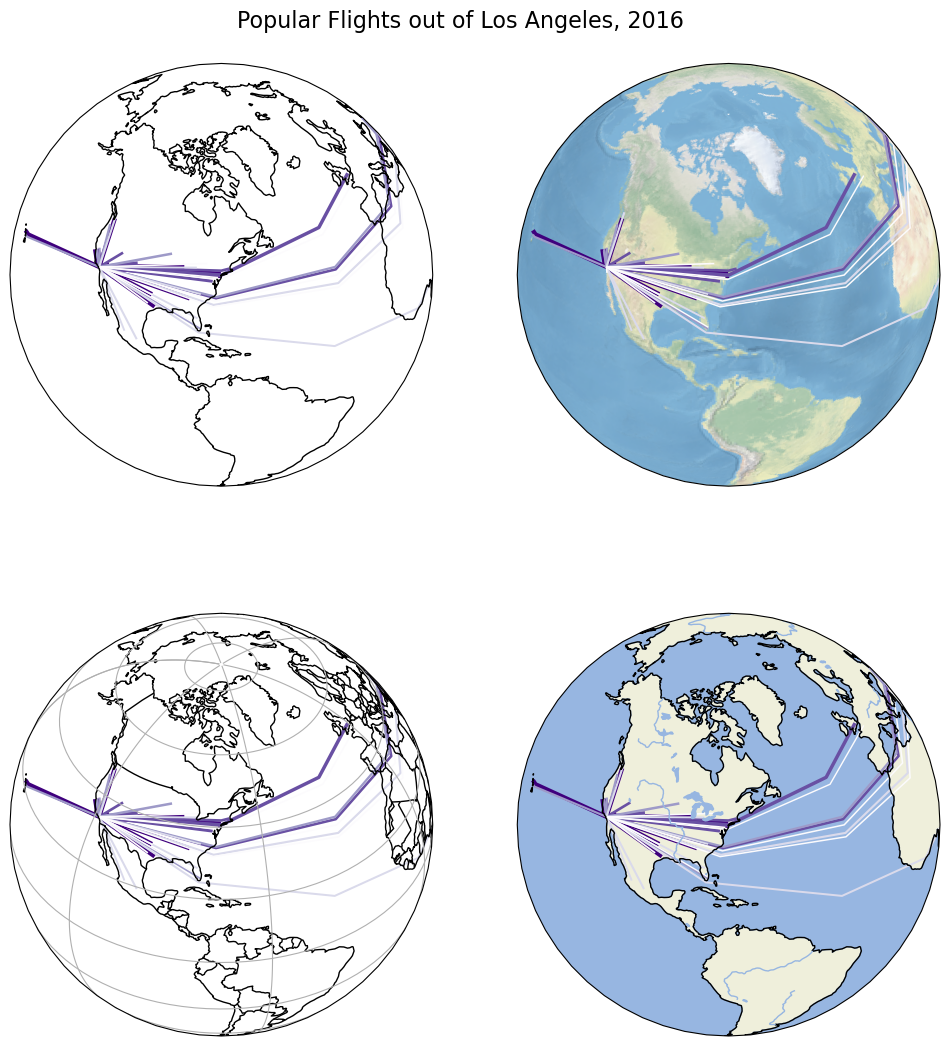

In [13]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import cartopy
import mapclassify as mc

la_flights = gpd.read_file(gplt.datasets.get_path('la_flights'))
scheme = mc.Quantiles(la_flights['Passengers'], k=5)

f, axarr = plt.subplots(2, 2, figsize=(12, 12), subplot_kw={
    'projection': gcrs.Orthographic(central_latitude=40.7128, central_longitude=-74.0059)
})
plt.suptitle('Popular Flights out of Los Angeles, 2016', fontsize=16)
plt.subplots_adjust(top=0.95)

ax = gplt.sankey(
    la_flights, scale='Passengers', hue='Passengers', cmap='Purples', scheme=scheme, ax=axarr[0][0]
)
ax.set_global()
ax.outline_patch.set_visible(True)
ax.coastlines()

ax = gplt.sankey(
    la_flights, scale='Passengers', hue='Passengers', cmap='Purples', scheme=scheme, ax=axarr[0][1]
)
ax.set_global()
ax.outline_patch.set_visible(True)
ax.stock_img()

ax = gplt.sankey(
    la_flights, scale='Passengers', hue='Passengers', cmap='Purples', scheme=scheme, ax=axarr[1][0]
)
ax.set_global()
ax.outline_patch.set_visible(True)
ax.gridlines()
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS)

ax = gplt.sankey(
    la_flights, scale='Passengers', hue='Passengers', cmap='Purples', scheme=scheme, ax=axarr[1][1]
)
ax.set_global()
ax.outline_patch.set_visible(True)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAKES)
ax.add_feature(cartopy.feature.RIVERS)

In [ ]:
import matplotlib.pyplot as plt

import cartopy.crs as ccrs


def main():
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

    # make the map global rather than have it zoom in to
    # the extents of any plotted data
    ax.set_global()

    ax.stock_img()
    ax.coastlines()

    ax.plot(-0.08, 51.53, 'o', transform=ccrs.PlateCarree())
    ax.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.PlateCarree())
    ax.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.Geodetic())

    plt.show()


if __name__ == '__main__':
    main()

/var/folders/cq/d8h3wnqx5yd2tjl34nkmynr80000gn/T/ipykernel_5943/2960207033.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  WI_fire = pd.read_csv("WI_fire.csv")


Text(0, 0.5, 'Latitude')

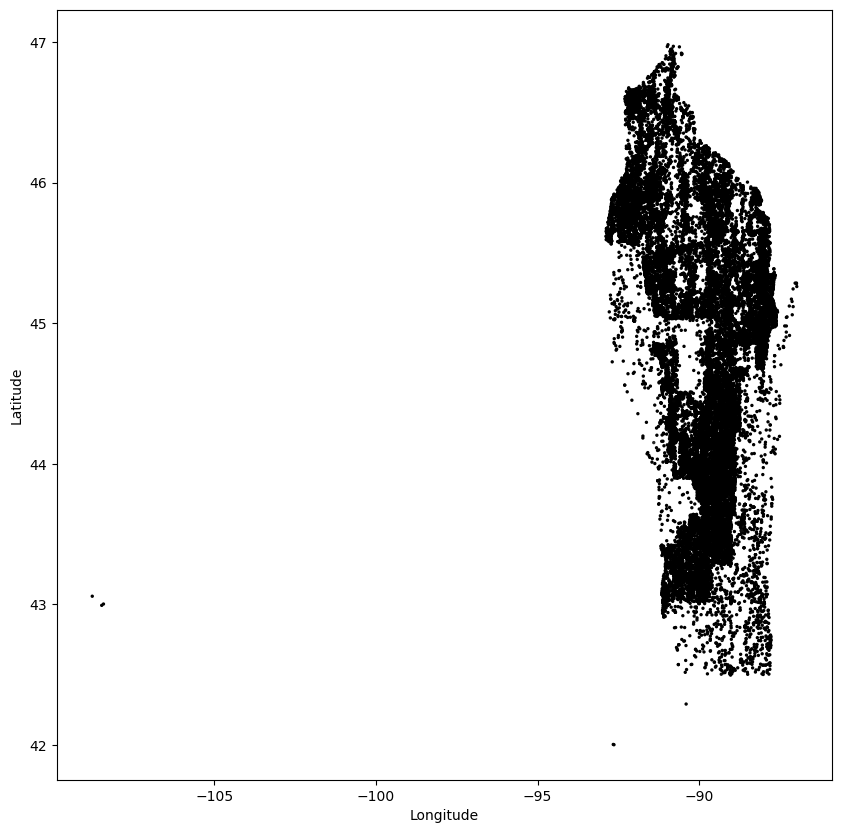

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

WI_fire = pd.read_csv("WI_fire.csv")

fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(WI_fire.LONGITUDE, WI_fire.LATITUDE, s=2, c=WI_fire.FIRE_SIZE, cmap='gray')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

<AxesSubplot: xlabel='LONGITUDE', ylabel='LATITUDE'>

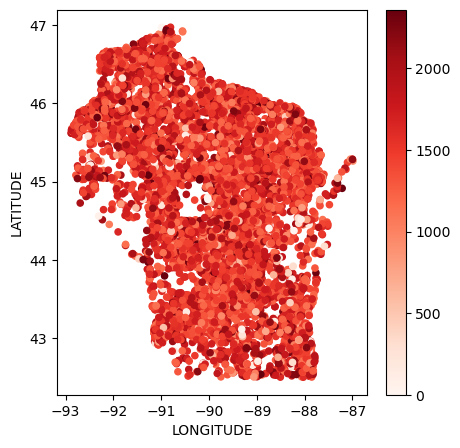

In [2]:
WI_fire = WI_fire.loc[(WI_fire.LATITUDE>42.5) & (WI_fire.LONGITUDE >-95)]

fig,ax = plt.subplots(figsize=(5,5))
#ax.scatter(WI_fire.LONGITUDE, WI_fire.LATITUDE, s=2, c=WI_fire.CONT_TIME, cmap='Reds')
#ax.set_xlabel("Longitude")
#ax.set_ylabel("Latitude")

# alternative way
WI_fire.plot(ax=ax, x="LONGITUDE", y="LATITUDE", kind="scatter", c=WI_fire.CONT_TIME, cmap='Reds')

In [3]:
import geopandas as gpd

WI = gpd.read_file("WI_County_Boundaries_24K/County_Boundaries_24K.shp")
print(WI.crs)
WI_wgs84 = WI.to_crs({'init': 'epsg:4269'})
print(WI_wgs84.crs)

PROJCS["NAD_1983_HARN_Wisconsin_TM",GEOGCS["GCS_North_American_1983_HARN",DATUM["D_North_American_1983_HARN",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-90],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",520000],PARAMETER["false_northing",-4480000],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


/Users/minchen/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


+init=epsg:4269 +type=crs


/var/folders/cq/d8h3wnqx5yd2tjl34nkmynr80000gn/T/ipykernel_5943/2570662567.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, alpha=0.4)


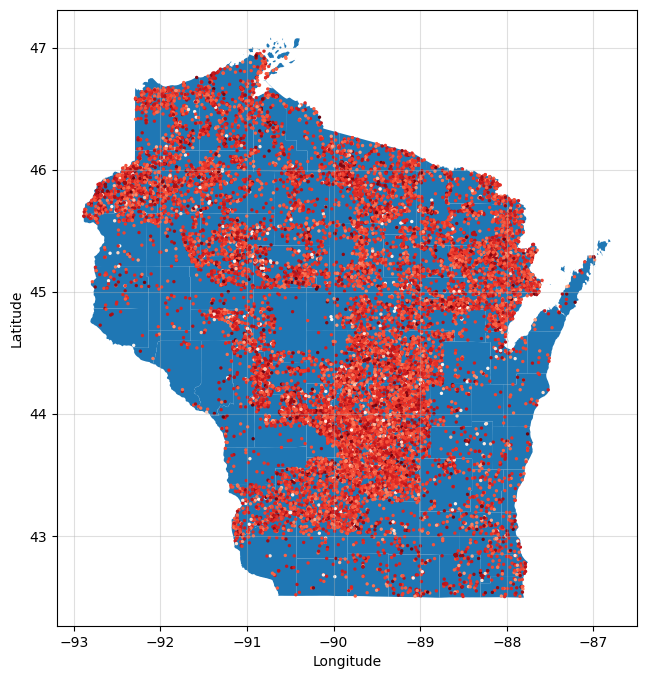

In [7]:
import geoplot as gplt
import geoplot.crs as gcrs

fig, ax = plt.subplots(figsize=(8,8))
#gplt.polyplot(WI_wgs84, ax=ax)
WI_wgs84.plot(ax=ax)
ax.scatter(WI_fire.LONGITUDE, WI_fire.LATITUDE, s=2, c=WI_fire.CONT_TIME, cmap='Reds')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(b=True, alpha=0.4)

In [8]:
import geopandas as gpd

world = gpd.read_file("World_Countries_shp/World_Countries__Generalized_.shp")
# world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
world

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,1,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
1,2,United States Minor Outlying Islands,UM,United States,US,0.480216,0.003216,"MULTIPOLYGON (((-160.02114 -0.39805, -160.0281..."
2,3,Cook Islands,CK,New Zealand,NZ,0.980664,0.013073,"MULTIPOLYGON (((-159.74698 -21.25667, -159.793..."
3,4,French Polynesia,PF,France,FR,3.930211,0.175332,"MULTIPOLYGON (((-149.17920 -17.87084, -149.258..."
4,5,Niue,NU,New Zealand,NZ,0.541413,0.021414,"POLYGON ((-169.89389 -19.14556, -169.93088 -19..."
...,...,...,...,...,...,...,...,...
244,245,Northern Mariana Islands,MP,United States,US,0.908853,0.019927,"MULTIPOLYGON (((145.73468 15.08722, 145.72830 ..."
245,246,Palau,PW,Palau,PW,1.105323,0.031136,"MULTIPOLYGON (((134.53137 7.35444, 134.52234 7..."
246,247,Russian Federation,RU,Russian Federation,RU,1536.287150,2931.526082,"MULTIPOLYGON (((-179.99999 68.98010, -179.9580..."
247,248,Spain,ES,Spain,ES,51.724956,52.915449,"MULTIPOLYGON (((-2.91472 35.27361, -2.93924 35..."


<AxesSubplot: >

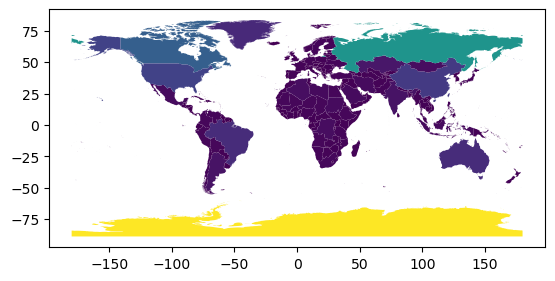

In [9]:
# The simpliest map of world countries
world.plot("SHAPE_Area")


In [1]:
import geoplot as gplt
gplt.polyplot(world)

/Users/minchen/opt/anaconda3/envs/geospatial/lib/python3.9/site-packages/geoplot/geoplot.py:9: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


SystemError: initialization of _internal failed without raising an exception

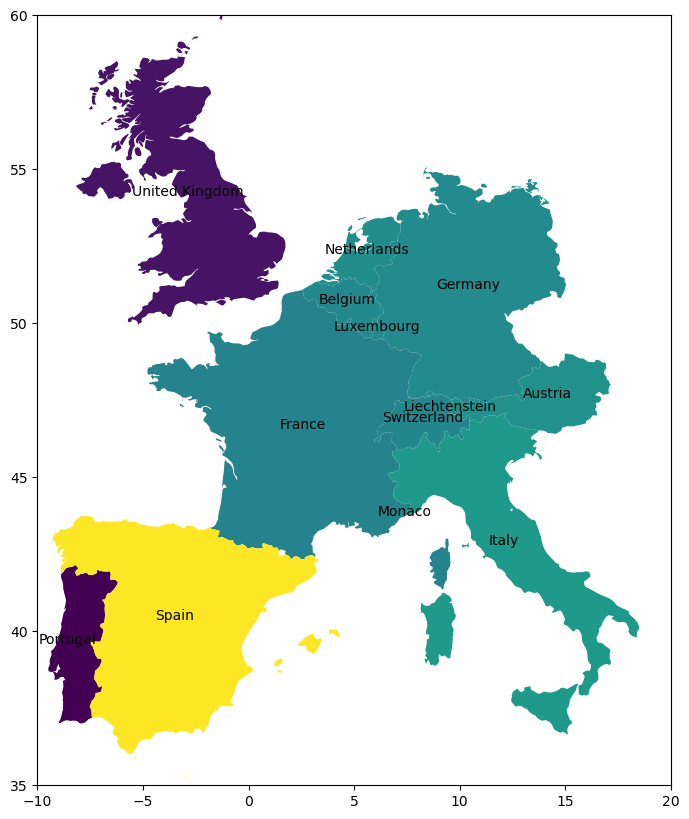

In [32]:
world = gpd.read_file("World_Countries_shp/World_Countries__Generalized_.shp")
Europe = world.loc[world['COUNTRY'].isin(['France', 'Germany','Spain',
                                              'United Kingdom', 'Italy','Monaco','Netherlands', 'Portugal',
                                              'Belgium','Austria','Switzerland','Luxembourg','Liechtenstein'])]
fig, ax = plt.subplots(figsize=(10,10))
Europe.plot(ax=ax, column='FID')
ax.set_xlim(-10, 20)
ax.set_ylim(35, 60)

for i,c in Europe.iterrows():
    ax.annotate(text=c["COUNTRY"], xy=c.geometry.centroid.coords[0], ha='center')

In [39]:
# https://data.giss.nasa.gov/gistemp/maps/
import netCDF4 as nc
ds = nc.Dataset("amaps.nc")
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.1
    title: GISTEMP Surface Temperature Analysis: January 2023 L-OTI(degC) Anomaly vs 1951-1980
    institution: NASA Goddard Institute for Space Sciences
    source: https://data.giss.nasa.gov/gistemp/
    history: Created 2023-02-28 10:58 EST by amaps_netcdf.cgi 1.2 using parameters GHCNv4_ERSSTv5_1200km_Anom_1_2023_2023_1951_1980_100_180_90_0_2_
    dimensions(sizes): lat(90), lon(180)
    variables(dimensions): float32 lon(lon), float32 lat(lat), float32 TEMPANOMALY(lat, lon)
    groups: 

In [35]:
for dim in ds.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 90
<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 180


In [36]:
for var in ds.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    long_name: Longitude
    standard_name: longitude
    units: degrees_east
unlimited dimensions: 
current shape = (180,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    long_name: Latitude
    standard_name: latitude
    units: degrees_north
unlimited dimensions: 
current shape = (90,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 TEMPANOMALY(lat, lon)
    long_name: Temperature anomaly
    standard_name: surface_temperature_anomaly
    missing_value: 9999.0
    units: K
unlimited dimensions: 
current shape = (90, 180)
filling on, default _FillValue of 9.969209968386869e+36 used


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

lat = ds.variables['lat'][:]
lon = ds.variables['lon'][:]
Tanorm = ds.variables['TEMPANOMALY'][:]

Tanorm


m = Basemap(projection='robin',
              #llcrnrlon=-93.,
              #llcrnrlat=35.,
              #urcrnrlon=-73.,
              #urcrnrlat=45.,
              #resolution='l',
           lat_0=0, lon_0=0) 
# projection, lat/lon extents and resolution of polygons to draw
# resolutions: c - crude, l - low, i - intermediate, h - high, f - full

m.drawcoastlines(linewidth=0.25)
m.drawcountries(linewidth=0.25)


xx, yy = np.meshgrid(lon, lat)
m.pcolormesh(xx, yy, Tanorm,
             latlon=True,
             cmap='RdBu_r')
plt.clim(-7, 7)
plt.title('January 2023 Temperature Anomaly')
plt.colorbar(label='temperature anomaly (°C)');

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

1.029849527383098

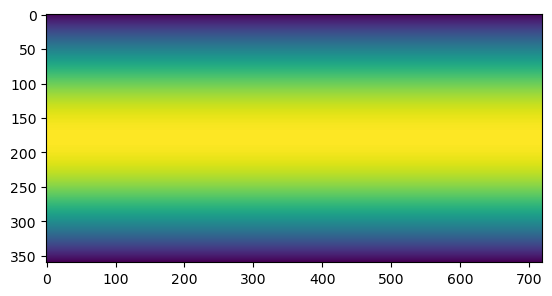

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import netCDF4 as nc

ds = nc.Dataset("FLUXCOM/LE.RS_METEO.EBC-BWR.MLM-MARS.METEO-GSWP3.720_360.monthly.2000.nc")
#for var in ds.variables.values():
#    print(var)
lat = ds.variables['lat'][:]
lon = ds.variables['lon'][:]
LE = ds.variables['LE'][:]

weight1d = np.cos(np.deg2rad(lat))
weight2d = np.transpose(np.tile(weight1d, (720, 1)))
weight3d = np.tile(weight2d, (12, 1, 1))
plt.imshow(weight2d)

weight3d.shape
x = LE[0,:,:]

y = np.average(LE, weights=weight3d)
y